In [1]:
# Building ML settings
# %cd /content/drive/MyDrive/Colab otebooks/class/project
# %pwd
!pip install matminer seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Set universal theme for figures
plt.style.use('seaborn-v0_8')
# Configure plot settings
plt.rcParams['figure.figsize'] = (6, 4.5)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['axes.grid'] = True
# Set numerical precision
np.set_printoptions(precision=5)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.0/809.0 kB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 32.5 MB/s eta 0:00:00
  Created wheel for bibtexparser: filename=bibtexparser-1.4.3-py3-none-any.whl size=4354

In [ ]:
# Load dataset
from matminer.datasets import load_dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = load_dataset("castelli_perovskites")
df.head()

Fetching castelli_perovskites.json.gz from https://ndownloader.figshare.com/files/13284197 to /usr/local/lib/python3.11/dist-packages/matminer/datasets/castelli_perovskites.json.gz


Fetching https://ndownloader.figshare.com/files/13284197 in MB: 4.9479679999999995MB [00:00, 452.00MB/s]               


fermi level  fermi width  e_form  gap is direct  \
0     0.312138     0.001837    2.16           True   
1     0.297083     0.001837    1.52           True   
2     0.191139     0.003675    1.48           True   
3     0.316346     0.001837    1.24           True   
4     0.312658     0.003675    0.62           True   

                                           structure          mu_b  formula  \
0  [[0. 0. 0.] Rh, [1.97727 1.97727 1.97727] Te, ...  1.974478e-02   RhTeN3   
1  [[2.54042 0.      0.     ] Hf, [1.02039 2.1447... -2.253054e-05   HfTeO3   
2  [[0.60791 0.      0.     ] Re, [2.18661 2.1463...  4.982109e+00  ReAsO2F   
3  [[2.83091 0.      0.     ] W, [2.65735 2.09187... -8.684496e-01   WReO2S   
4  [[0.00519 0.      0.     ] Bi, [2.17266 2.1405...  2.164069e-15  BiHfO2F   

        vbm       cbm  gap gllbsc  
0  6.187694  6.187694         0.0  
1  6.033125  6.033125         0.0  
2  6.602253  6.602253         0.0  
3  5.738462  5.738462         0.0  
4  6.074736  6.074736         0.0

In [6]:
from matminer.datasets import load_dataset
import json

df = load_dataset("castelli_perovskites")
df = df.dropna(subset=["structure", "gap gllbsc"])
df = df[df["gap gllbsc"] > 0].reset_index(drop=True)

# Structureをdict化し、gapと一緒に保存
data = [
    {
        "structure": s.as_dict(),
        "target": gap
    }
    for s, gap in zip(df["structure"], df["gap gllbsc"])
]

# 保存
with open("/content/drive/MyDrive/castelli_perovskites_structures.json", "w") as f:
    json.dump(data, f)


In [ ]:
# Convert formula to comoposition
from pymatgen.core.composition import Composition
from tqdm import tqdm
tqdm.pandas()

def get_atomic_fraction_dict(formula):
    try:
        comp = Composition(formula)
        return comp.fractional_composition.as_dict()
    except Exception as e:
        print(f"Error at: {formula}, {e}")
        return {}

# Apply
df_atomic_frac = df["formula"].progress_apply(get_atomic_fraction_dict)

df_atomic_frac = pd.DataFrame(df_atomic_frac.tolist()).fillna(0)

# Merged into the original DataFrame
df = pd.concat([df, df_atomic_frac], axis=1)

100%|██████████| 18928/18928 [00:00<00:00, 30552.35it/s]


In [ ]:
# Basic information on the data set
print("Number of rows:", df.shape[0])
print("Number of variables (columns):", df.shape[1])
print("\nData types:\n", df.dtypes.value_counts())
print("\nMissing values per column:\n", df.isnull().sum())
print("\nUnique values in categorical columns:\n", df.drop(columns=["structure"]).select_dtypes(include=["object", "bool"]).nunique())

Number of rows: 18928
Number of variables (columns): 66

Data types:
 float64    63
object      2
bool        1
Name: count, dtype: int64

Missing values per column:
 fermi level      0
fermi width      0
e_form           0
gap is direct    0
structure        0
                ..
Cu               0
Ni               0
Ag               0
Ba               0
Al               0
Length: 66, dtype: int64

Unique values in categorical columns:
 gap is direct        2
formula          18928
dtype: int64


In [ ]:
df.head()

fermi level  fermi width  e_form  gap is direct  \
0     0.312138     0.001837    2.16           True   
1     0.297083     0.001837    1.52           True   
2     0.191139     0.003675    1.48           True   
3     0.316346     0.001837    1.24           True   
4     0.312658     0.003675    0.62           True   

                                           structure          mu_b  formula  \
0  [[0. 0. 0.] Rh, [1.97727 1.97727 1.97727] Te, ...  1.974478e-02   RhTeN3   
1  [[2.54042 0.      0.     ] Hf, [1.02039 2.1447... -2.253054e-05   HfTeO3   
2  [[0.60791 0.      0.     ] Re, [2.18661 2.1463...  4.982109e+00  ReAsO2F   
3  [[2.83091 0.      0.     ] W, [2.65735 2.09187... -8.684496e-01   WReO2S   
4  [[0.00519 0.      0.     ] Bi, [2.17266 2.1405...  2.164069e-15  BiHfO2F   

        vbm       cbm  gap gllbsc  ...   Ge   Nb   Ir   Ca    B   Cu   Ni  \
0  6.187694  6.187694         0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  6.033125  6.033125         0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  6.602253  6.602253         0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  5.738462  5.738462         0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  6.074736  6.074736         0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    Ag   Ba   Al  
0  0.0  0.0  0.0  
1  0.0  0.0  0.0  
2  0.0  0.0  0.0  
3  0.0  0.0  0.0  
4  0.0  0.0  0.0  

[5 rows x 66 columns]

In [ ]:
# Statistics on datasets
numeric_cols = df.select_dtypes(include="number").columns
print(df[numeric_cols].describe())

        fermi level   fermi width        e_form          mu_b           vbm  \
count  18928.000000  18928.000000  18928.000000  18928.000000  18928.000000   
mean       0.213770      0.002362      1.470932      0.870669      5.853705   
std        0.082382      0.000830      0.742502      1.695944      0.509437   
min       -0.096153      0.001837     -0.640000     -5.763449      4.264696   
25%        0.163024      0.001837      0.960000      0.000000      5.519486   
50%        0.216352      0.001837      1.360000      0.140870      5.853191   
75%        0.267705      0.003675      1.840000      1.866425      6.172323   
max        0.524917      0.003675      5.160000      9.659854      9.410918   

                cbm    gap gllbsc            Rh            Te             N  \
count  18928.000000  18928.000000  18928.000000  18928.000000  18928.000000   
mean       5.782879      0.070813      0.007692      0.007692      0.200000   
std        0.530577      0.459684      0.038845    

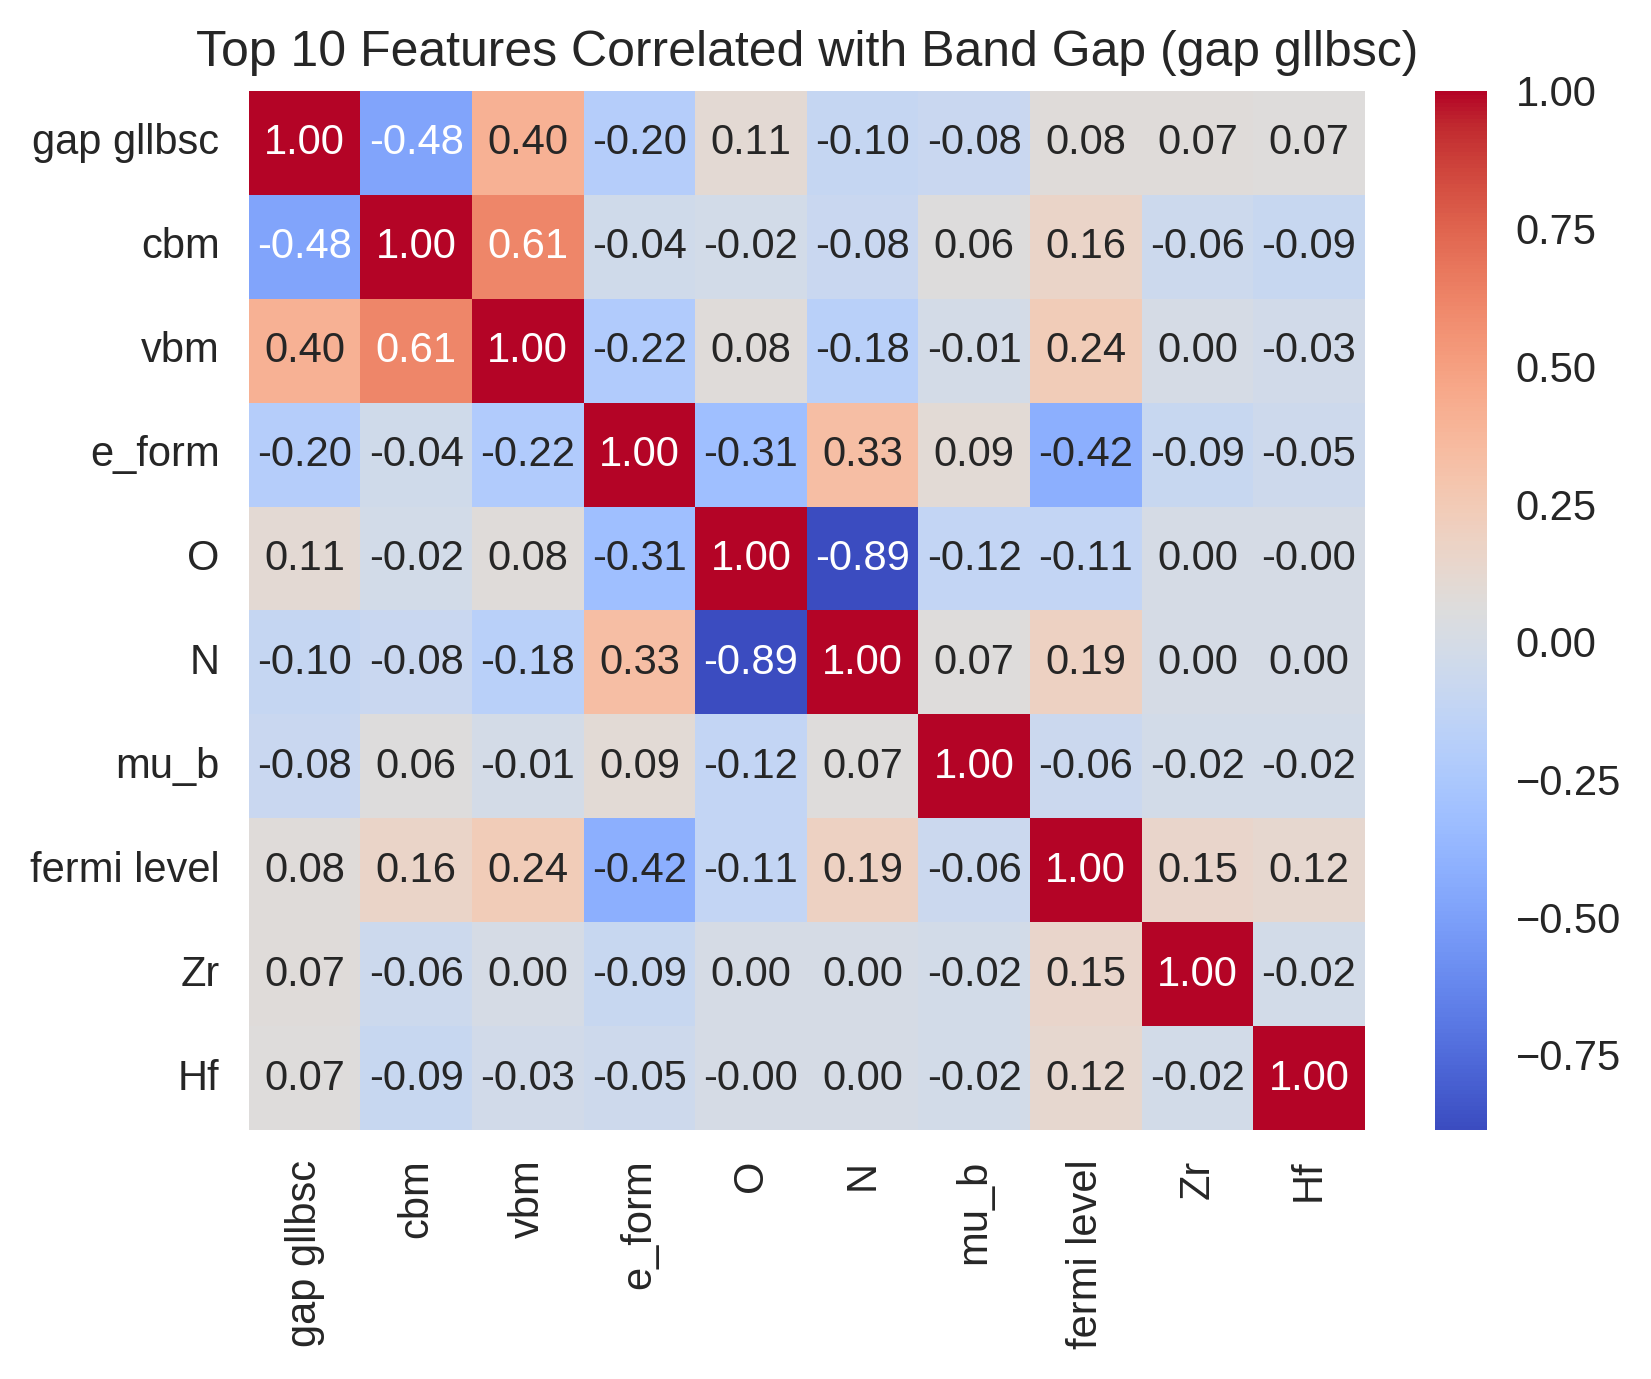

In [ ]:
# Correlation heat map
import numpy as np

# Target variable.
target_col = "gap gllbsc"

# Obtain the absolute value of the correlation coefficient and select the top n correlations with the objective variable
top_n = 10
corr_with_target = df[numeric_cols].corr()[target_col].abs().sort_values(ascending=False)
top_features = corr_with_target.head(top_n).index.tolist()

df_top_features = df[top_features]

# Visualisation of correlation matrices (limited to upper-level features)
sns.heatmap(df_top_features.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"Top {top_n} Features Correlated with Band Gap (gap gllbsc)")
plt.show()

In [ ]:
# Select numeric columns only
num_cols = df_top_features.select_dtypes(include="number").columns

# Limit to 1000 samples as too many samples are heavy
sns.pairplot(df_top_features[num_cols].sample(1000, random_state=0))
plt.show()

In [ ]:
# gap gllbsc ≈ cbm - vbm ?
diff = (df["cbm"] - df["vbm"])
is_equal = np.isclose(diff, df["gap gllbsc"])
print(f"完全一致: {is_equal.sum()} / {len(df)}")
print(f"差の統計: {np.abs(diff - df['gap gllbsc']).describe()}")

完全一致: 18193 / 18928
差の統計: count    18928.000000
mean         0.141639
std          0.919368
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         13.990000
dtype: float64


Fold 1 - MAE: 0.174, R²: 0.093
Fold 2 - MAE: 0.181, R²: 0.085
Fold 3 - MAE: 0.164, R²: 0.060
Fold 4 - MAE: 0.171, R²: 0.089
Fold 5 - MAE: 0.176, R²: 0.092

Average MAE: 0.173 ± 0.005
Average R²: 0.084 ± 0.012


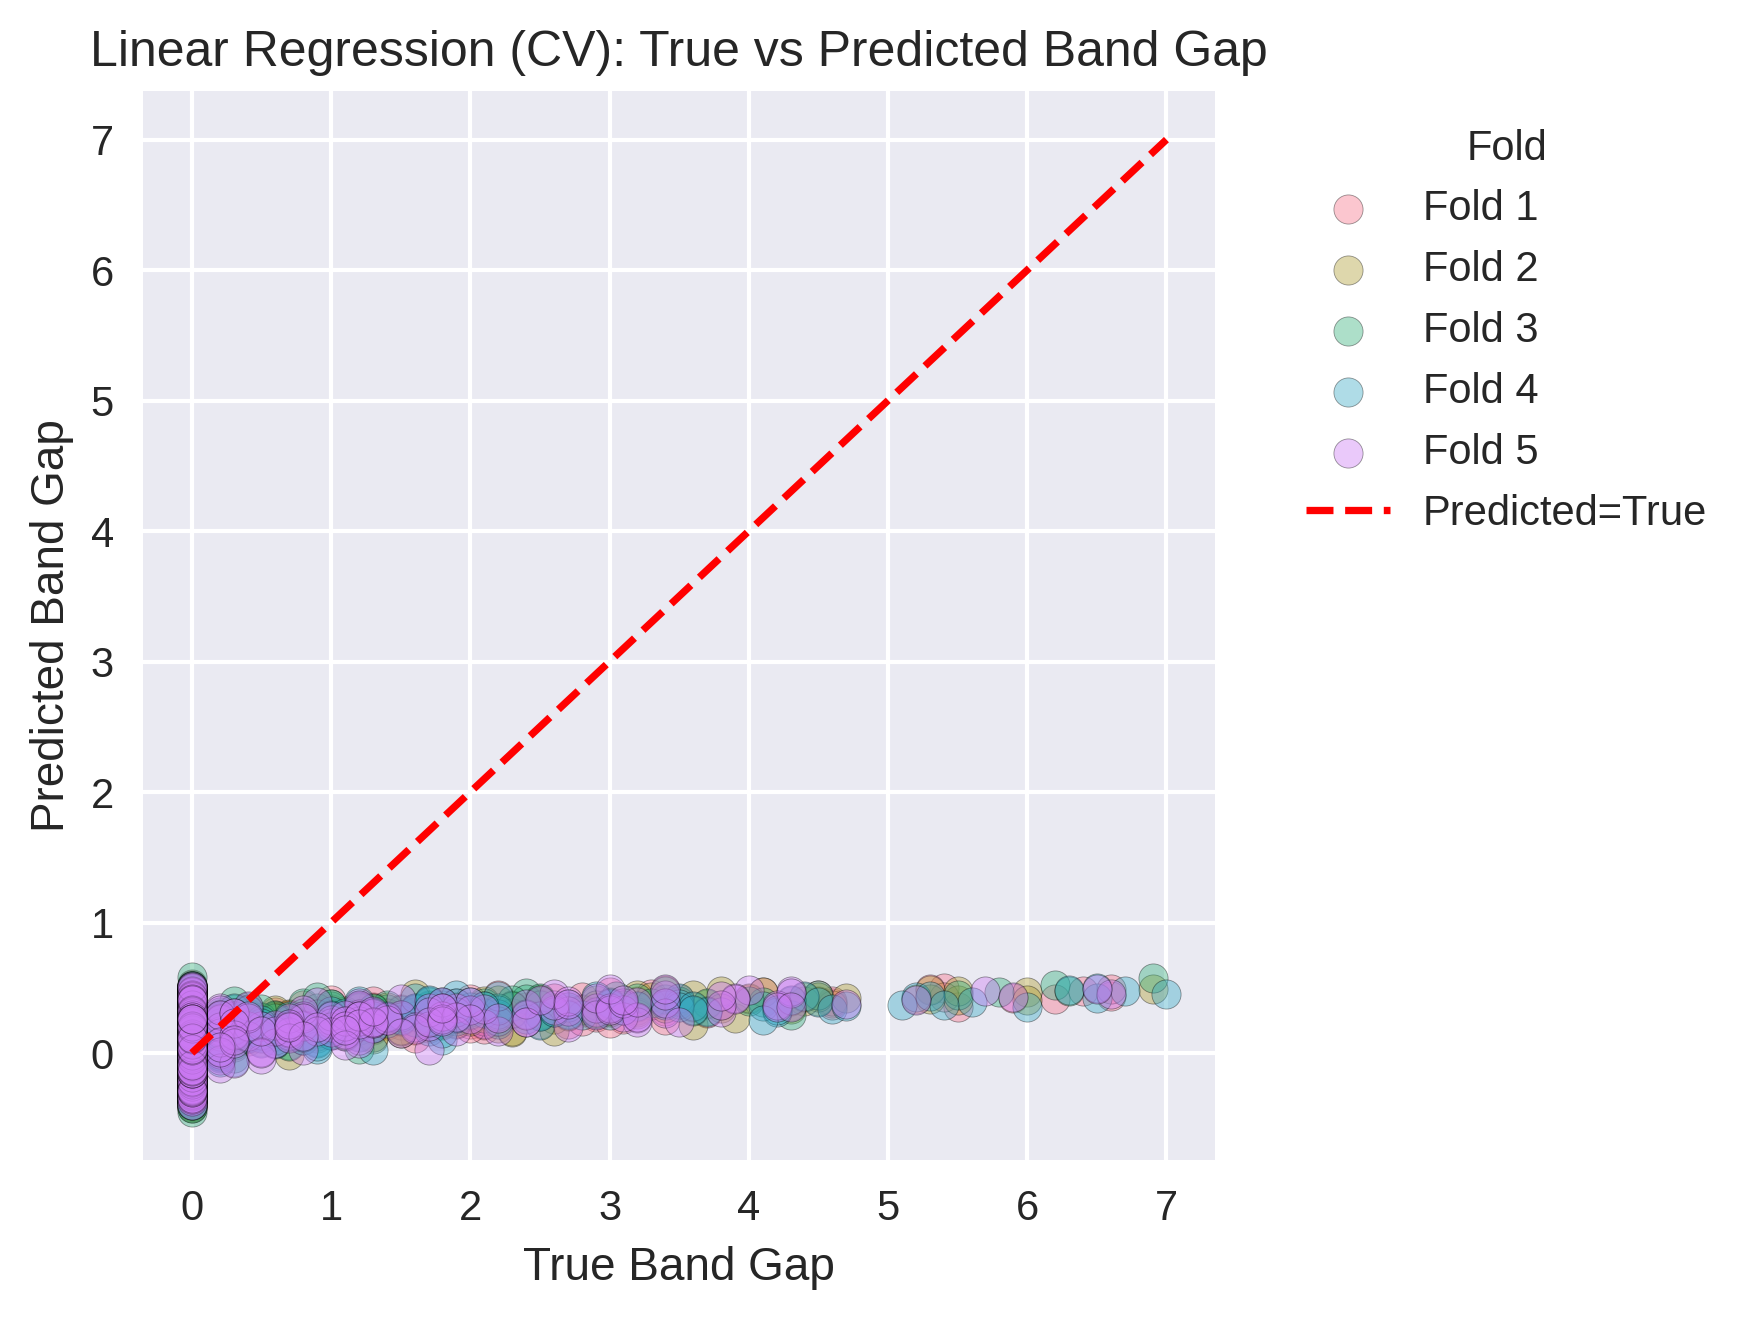

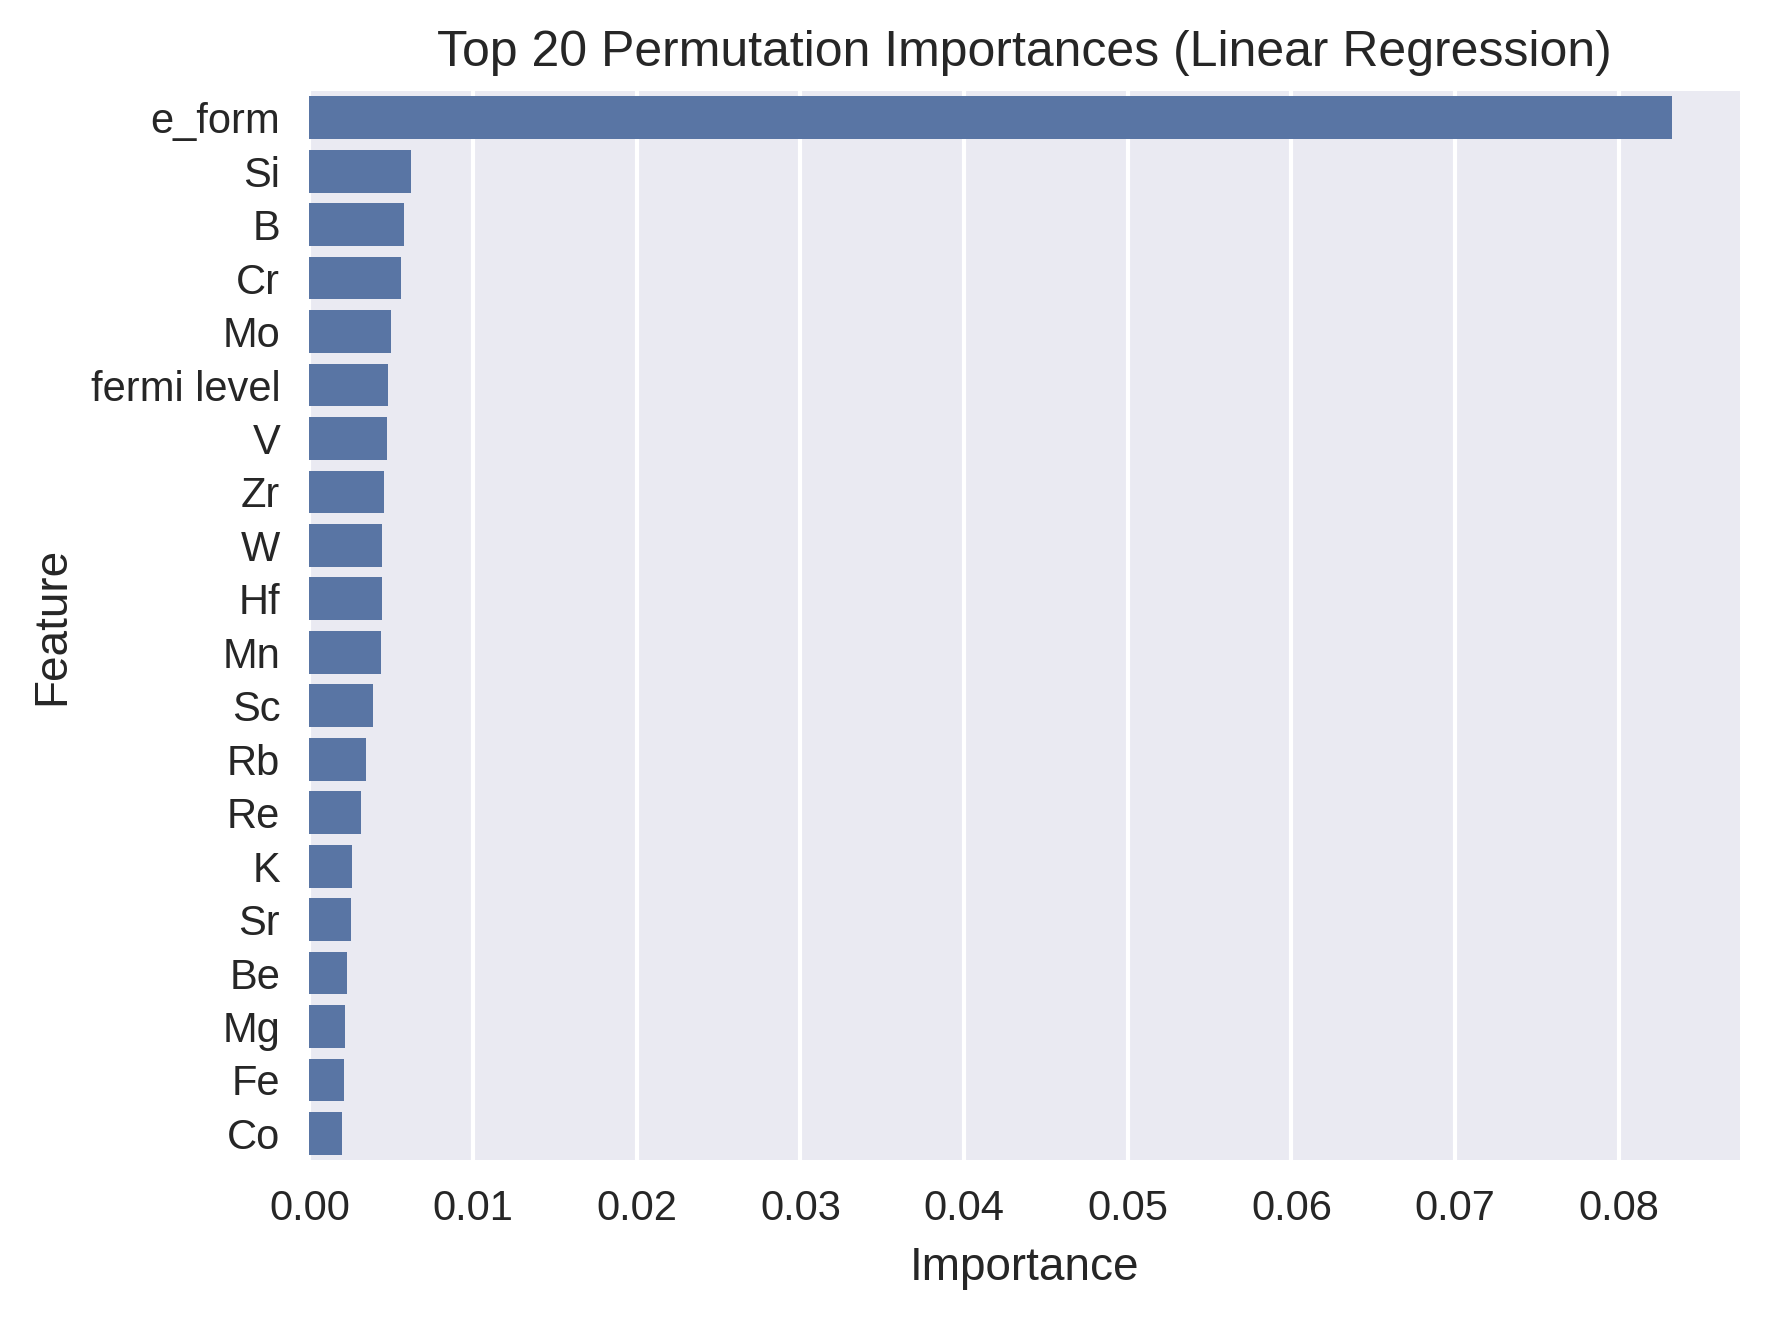

In [ ]:
# Predicting the band gap by linear regression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# # Predicting the band gap by linear regression with CV-based scatter plot & permutation importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Definition of features and target variables
X = df.drop(columns=["gap gllbsc", "formula", "gap is direct", "cbm", "vbm", "structure"])
y = df["gap gllbsc"]
feature_names = X.columns

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Preparing models and cross-validation
model = LinearRegression()
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# For saving results
y_true_all, y_pred_all, fold_ids = [], [], []
importances_list = []
mae_list, r2_list = [], []

# Color palette for folds
colors = sns.color_palette("husl", n_colors=cv.get_n_splits())

# CV loop
for fold, (train_idx, val_idx) in enumerate(cv.split(X_scaled)):
    X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    y_true_all.extend(y_val)
    y_pred_all.extend(y_pred)
    fold_ids.extend([fold] * len(y_val))  # Store fold info for each point

    # Score output
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    mae_list.append(mae)
    r2_list.append(r2)
    print(f"Fold {fold+1} - MAE: {mae:.3f}, R²: {r2:.3f}")

    # Permutation importance (by val data)
    result = permutation_importance(model, X_val, y_val, n_repeats=5, random_state=42, n_jobs=-1)
    importances_list.append(result.importances_mean)

# Average score output
print(f"\nAverage MAE: {np.mean(mae_list):.3f} ± {np.std(mae_list):.3f}")
print(f"Average R²: {np.mean(r2_list):.3f} ± {np.std(r2_list):.3f}")

# Scatterplot with fold-wise color & legend
for fold in range(cv.get_n_splits()):
    indices = [i for i, f in enumerate(fold_ids) if f == fold]
    plt.scatter(
        np.array(y_true_all)[indices],
        np.array(y_pred_all)[indices],
        color=colors[fold],
        alpha=0.4,
        label=f"Fold {fold+1}",
        edgecolor='k',
        linewidth=0.2
    )
plt.plot([min(y_true_all), max(y_true_all)], [min(y_true_all), max(y_true_all)], 'r--',label="Predicted=True")
plt.xlabel("True Band Gap")
plt.ylabel("Predicted Band Gap")
plt.title("Linear Regression (CV): True vs Predicted Band Gap")
plt.legend(title="Fold", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Permutation importance
avg_importance = np.mean(importances_list, axis=0)
imp_df = pd.DataFrame({"Feature": feature_names, "Importance": avg_importance})
imp_df = imp_df.sort_values("Importance", ascending=False).head(20)

sns.barplot(data=imp_df, x="Importance", y="Feature")
plt.title("Top 20 Permutation Importances (Linear Regression)")
plt.tight_layout()
plt.show()


Fold 1 - MAE: 0.071, R²: 0.526
Fold 2 - MAE: 0.073, R²: 0.534
Fold 3 - MAE: 0.059, R²: 0.510
Fold 4 - MAE: 0.064, R²: 0.641
Fold 5 - MAE: 0.073, R²: 0.460

Average MAE: 0.068 ± 0.006
Average R²: 0.534 ± 0.059


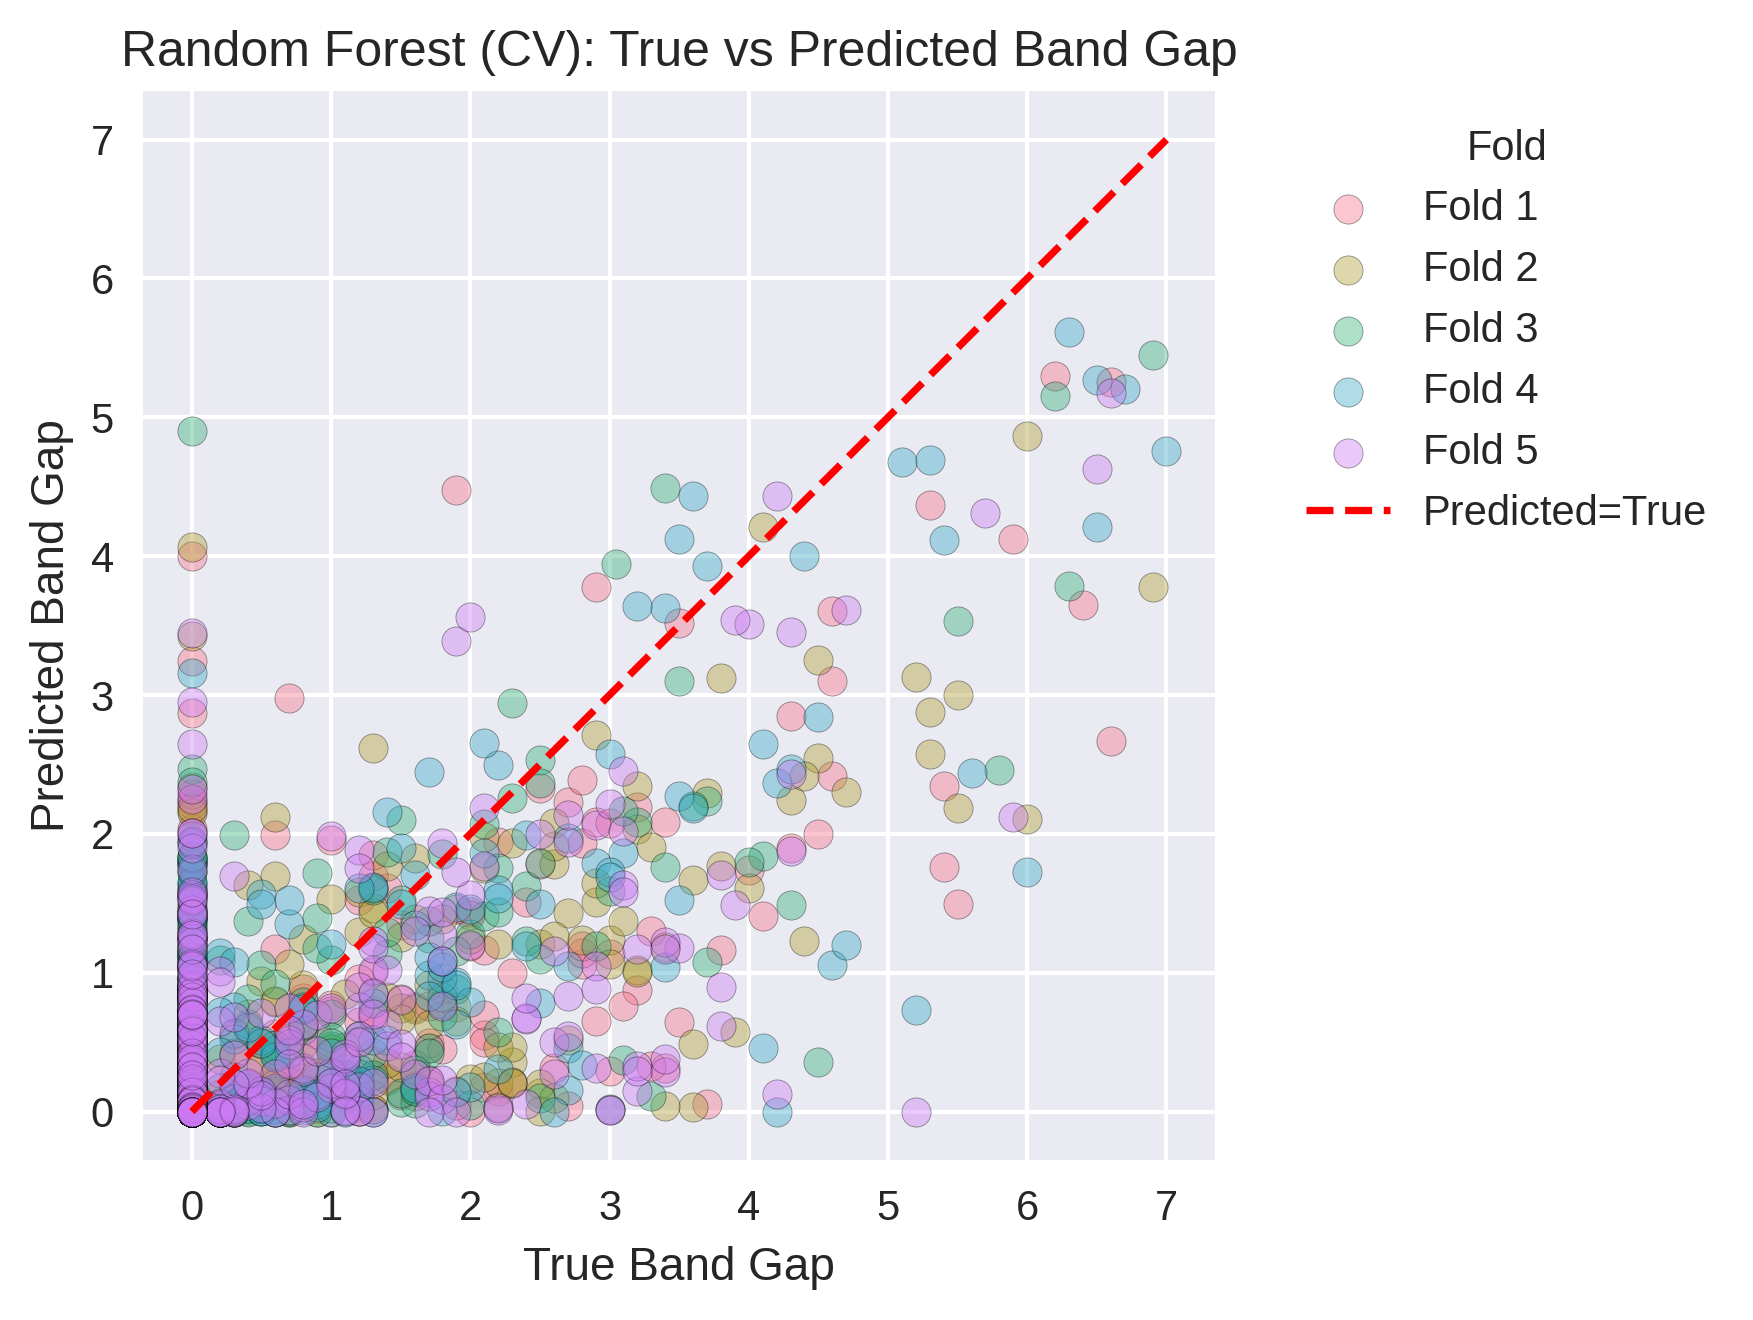

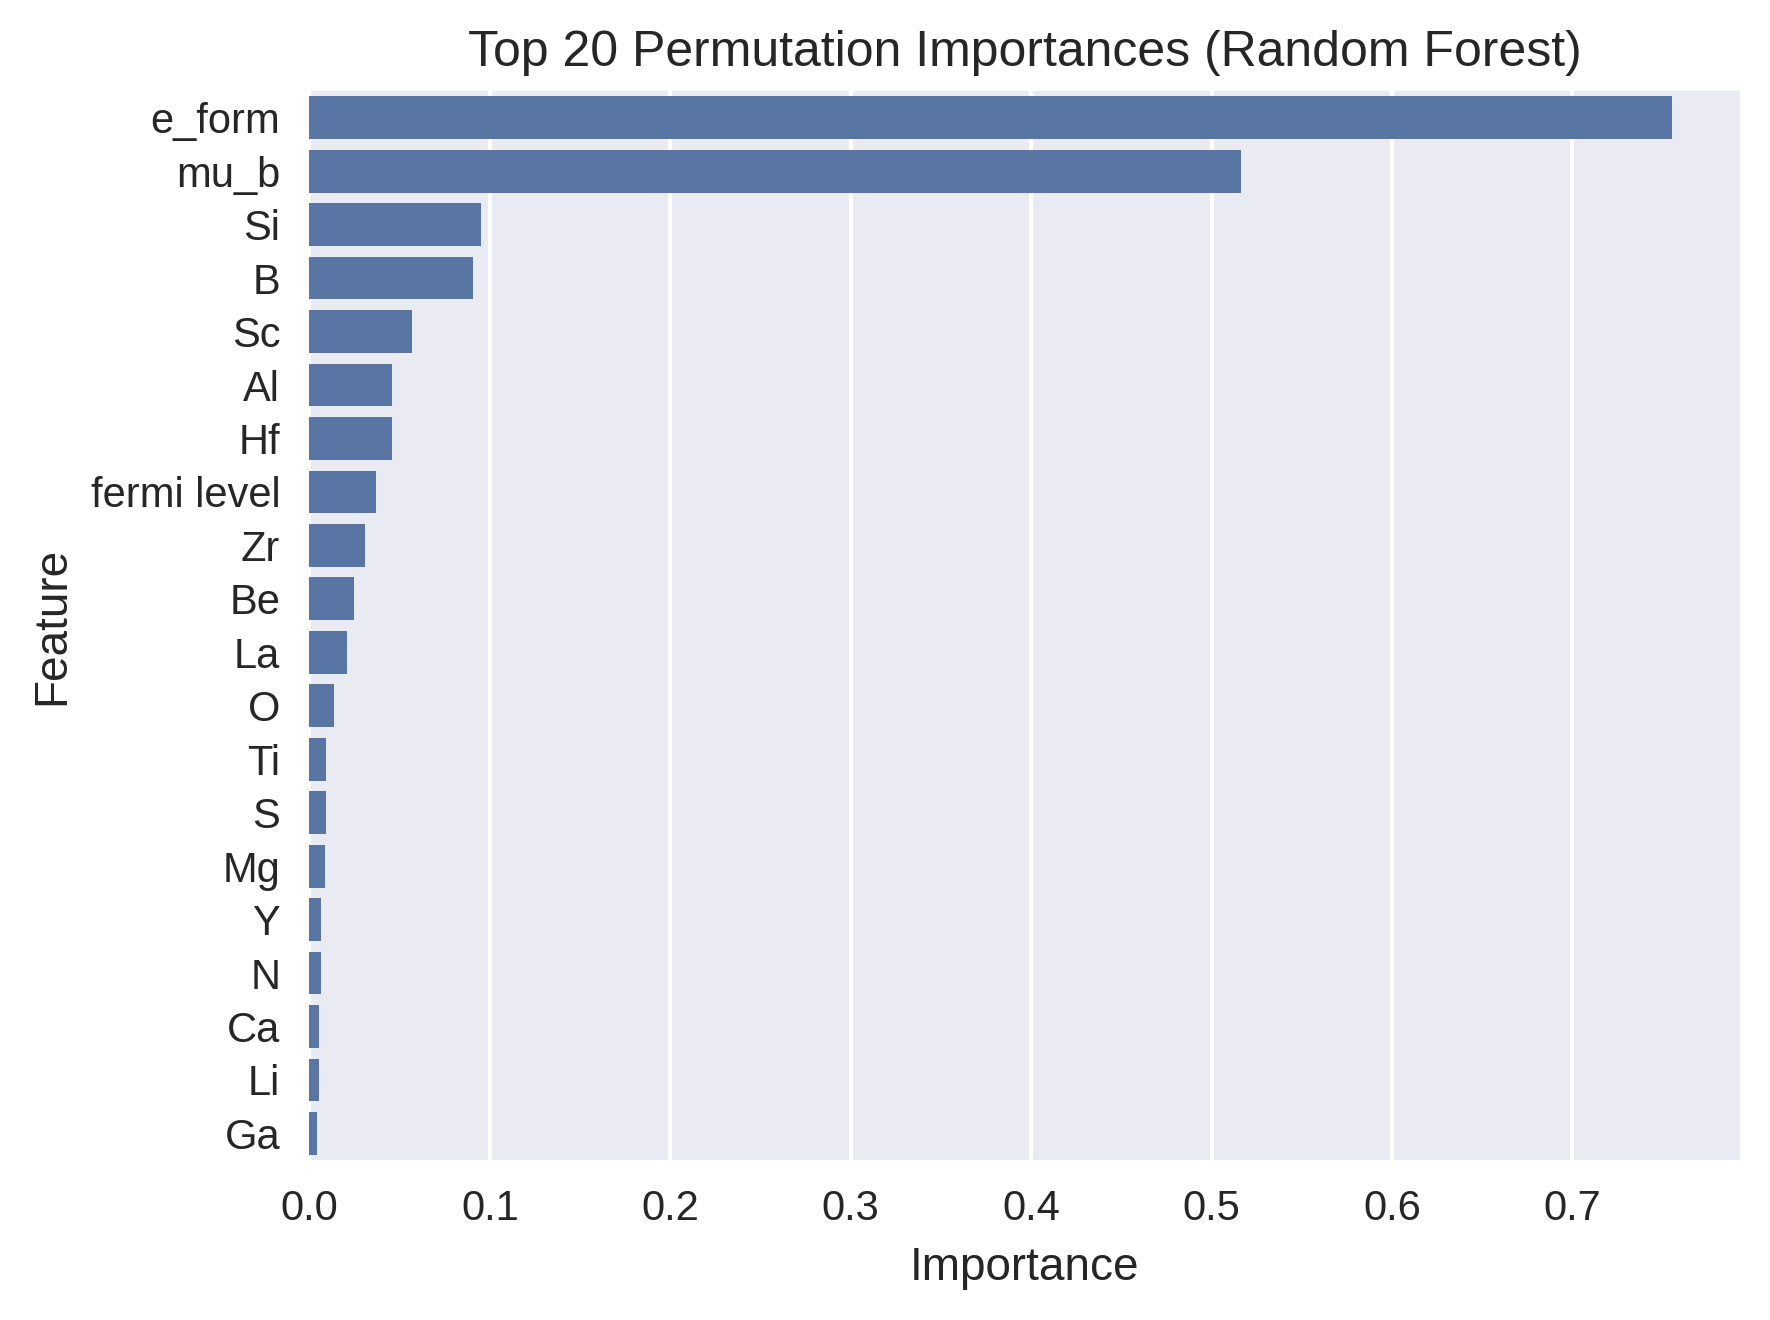

In [ ]:
# Predicting the band gap by Random Forest with CV-based scatter plot & permutation importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Definition of features and target variables
X = df.drop(columns=["gap gllbsc", "formula", "gap is direct", "cbm", "vbm", "structure"])
y = df["gap gllbsc"]
feature_names = X.columns

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Preparing models and cross-validation
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# For saving results
y_true_all, y_pred_all, fold_ids = [], [], []
importances_list = []
mae_list, r2_list = [], []

# Color palette for folds
colors = sns.color_palette("husl", n_colors=cv.get_n_splits())

# CV loop
for fold, (train_idx, val_idx) in enumerate(cv.split(X_scaled)):
    X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    y_true_all.extend(y_val)
    y_pred_all.extend(y_pred)
    fold_ids.extend([fold] * len(y_val))  # Store fold info for each point

    # Score output
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    mae_list.append(mae)
    r2_list.append(r2)
    print(f"Fold {fold+1} - MAE: {mae:.3f}, R²: {r2:.3f}")

    # Permutation importance (by val data)
    result = permutation_importance(model, X_val, y_val, n_repeats=5, random_state=42, n_jobs=-1)
    importances_list.append(result.importances_mean)

# Average score output
print(f"\nAverage MAE: {np.mean(mae_list):.3f} ± {np.std(mae_list):.3f}")
print(f"Average R²: {np.mean(r2_list):.3f} ± {np.std(r2_list):.3f}")

# Scatterplot with fold-wise color & legend
for fold in range(cv.get_n_splits()):
    indices = [i for i, f in enumerate(fold_ids) if f == fold]
    plt.scatter(
        np.array(y_true_all)[indices],
        np.array(y_pred_all)[indices],
        color=colors[fold],
        alpha=0.4,
        label=f"Fold {fold+1}",
        edgecolor='k',
        linewidth=0.2
    )
plt.plot([min(y_true_all), max(y_true_all)], [min(y_true_all), max(y_true_all)], 'r--',label="Predicted=True")
plt.xlabel("True Band Gap")
plt.ylabel("Predicted Band Gap")
plt.title("Random Forest (CV): True vs Predicted Band Gap")
plt.legend(title="Fold", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Permutation importance
avg_importance = np.mean(importances_list, axis=0)
imp_df = pd.DataFrame({"Feature": feature_names, "Importance": avg_importance})
imp_df = imp_df.sort_values("Importance", ascending=False).head(20)

sns.barplot(data=imp_df, x="Importance", y="Feature")
plt.title("Top 20 Permutation Importances (Random Forest)")
plt.tight_layout()
plt.show()
